# Emotional Analysis
## EmoBank Dataset labelled with Plutchik model emotions v 0.2 - Antonio Pagnotta

In [337]:
import np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
data = pd.read_csv('p_emotion.csv')

In [339]:
data.head()

,V,A,D,text,predicted_emotion
0,3.00,3.00,3.20,"Remember what she said in my last letter? """,surprise
1,2.80,3.10,2.80,If I wasn't working here.,sadness
2,3.00,3.00,3.00,"..""",surprise
3,3.44,3.00,3.22,Goodwill helps people get off of public assist...,joy
4,3.55,3.27,3.46,Sherry learned through our Future Works class ...,joy


In [340]:
print("Dataset shape: ")
print(data.shape)

Dataset shape: 
(10062, 5)


Rimuoviamo la colonna 'text', non è rilevante per l'analisi (poiché le frasi sono già state classificate).

In [341]:
no_text_data = data[['V', 'A', 'D', 'predicted_emotion']]
no_text_data.head()

,V,A,D,predicted_emotion
0,3.00,3.00,3.20,surprise
1,2.80,3.10,2.80,sadness
2,3.00,3.00,3.00,surprise
3,3.44,3.00,3.22,joy
4,3.55,3.27,3.46,joy


Controlliamo i possibili valori di predicted_emotion

In [342]:
print("Predicted Emotions = ", no_text_data['predicted_emotion'].unique(), "\n")

Predicted Emotions =  ['surprise' 'sadness' 'joy' 'anticipation'] 


Calcoliamo le statistiche descrittive per ogni emozione

In [343]:
for emotion in no_text_data['predicted_emotion'].unique():
    subset = no_text_data[no_text_data['predicted_emotion'] == emotion]
    print(f"Statistiche per '{emotion}':")
    print(subset[['V', 'A', 'D']].describe())

Statistiche per 'surprise':
                 V            A            D
count  1789.000000  1789.000000  1789.000000
mean      2.790911     3.086110     3.017306
std       0.335075     0.285135     0.245819
min       1.570000     2.090000     1.780000
25%       2.600000     2.900000     2.900000
50%       2.880000     3.000000     3.000000
75%       3.000000     3.220000     3.120000
max       4.300000     4.400000     4.200000
Statistiche per 'sadness':
                 V            A            D
count  1340.000000  1340.000000  1340.000000
mean      2.619761     3.068157     2.977052
std       0.326496     0.241016     0.234296
min       1.200000     2.200000     2.000000
25%       2.400000     2.900000     2.820000
50%       2.700000     3.000000     3.000000
75%       2.880000     3.200000     3.100000
max       3.700000     4.400000     4.000000
Statistiche per 'joy':
                 V            A            D
count  3763.000000  3763.000000  3763.000000
mean      3.191361    

Contiamo quanti valori ci sono per ogni tipo di emozione

In [344]:
print(no_text_data['predicted_emotion'].value_counts())
print("\n")

predicted_emotion
joy             3763
anticipation    3170
surprise        1789
sadness         1340
Name: count, dtype: int64



Controlliamo la distribuzione dei valori di Valence, Arousal e Dominance per ogni emozione

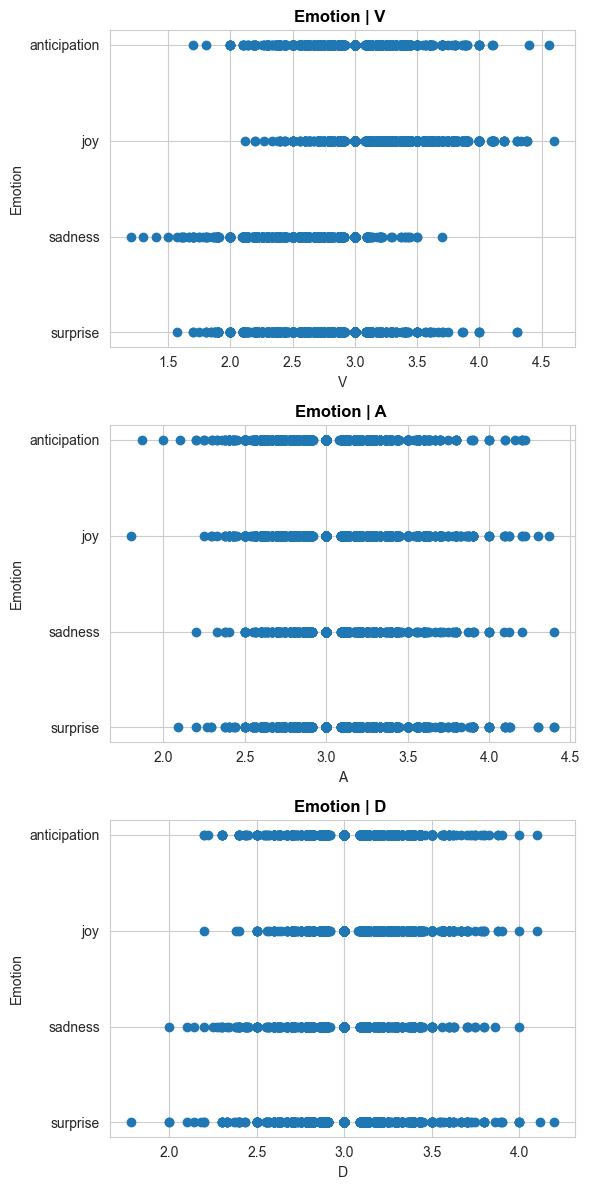

In [345]:
columns = ['V', 'A', 'D']
fig, axs = plt.subplots(3, 1, figsize=(6, 12))
for i, column in enumerate(columns):
    axs[i].plot(no_text_data[column], no_text_data['predicted_emotion'], 'o')
    axs[i].set_title(f'Emotion | {column} ', fontsize=12, fontweight='bold', color='black')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Emotion')
plt.tight_layout()
plt.show()

Notiamo valori più alti di valence per l'emozione di joy e valori più bassi per l'emozioni di sadness e surprise. Non si notano evidenti correlazioni tra i valori di arousal, dominance e le varie emozioni.

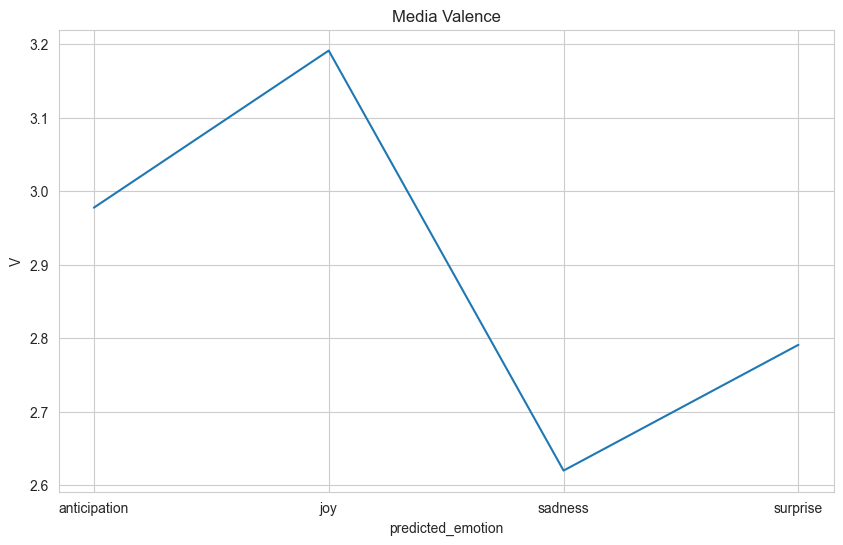

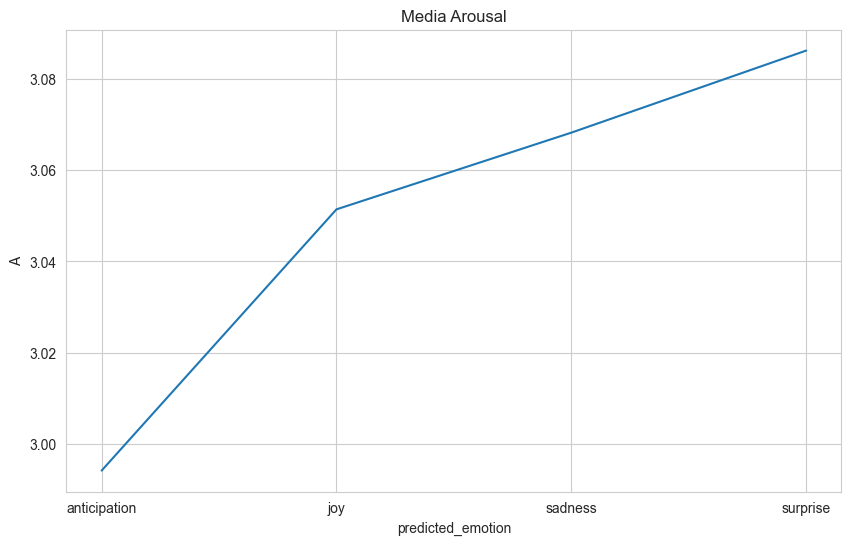

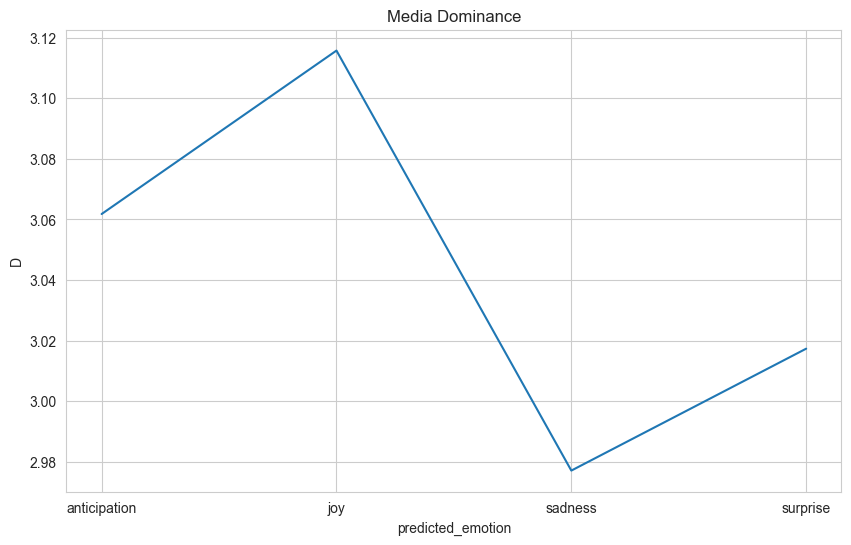

In [346]:
mean_values_by_emotion = no_text_data.groupby('predicted_emotion')[['V', 'A', 'D']].mean()

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Media Valence')
sns.lineplot(data=mean_values_by_emotion, x='predicted_emotion', y='V')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Media Arousal')
sns.lineplot(data=mean_values_by_emotion, x='predicted_emotion', y='A')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Media Dominance')
sns.lineplot(data=mean_values_by_emotion, x='predicted_emotion', y='D')
plt.show()

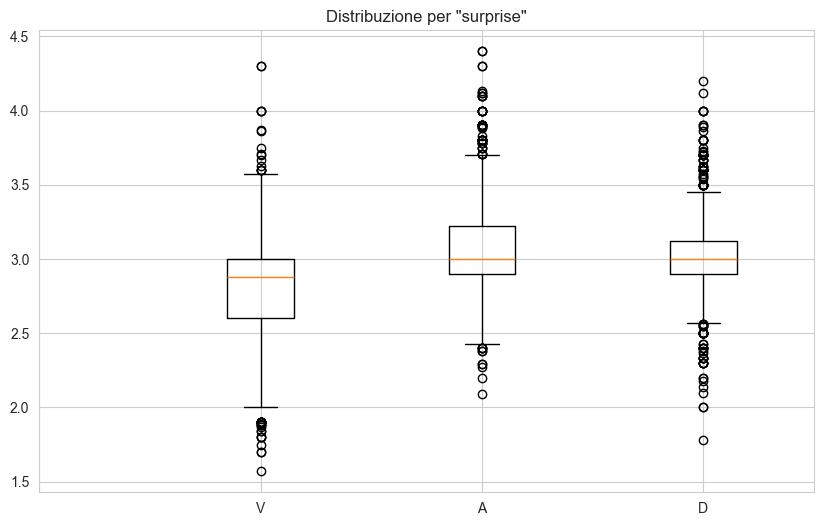

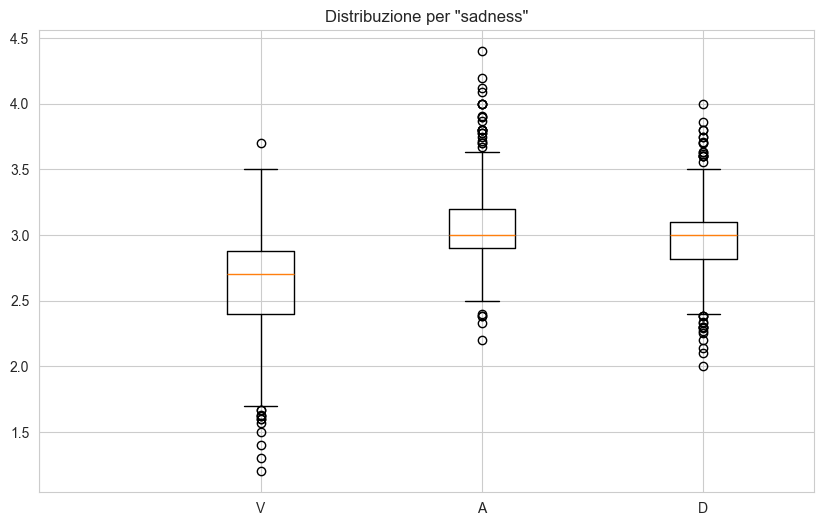

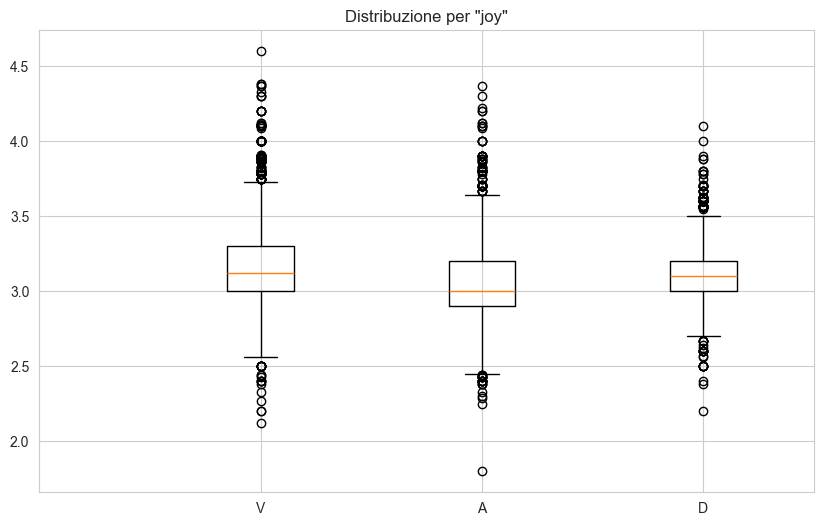

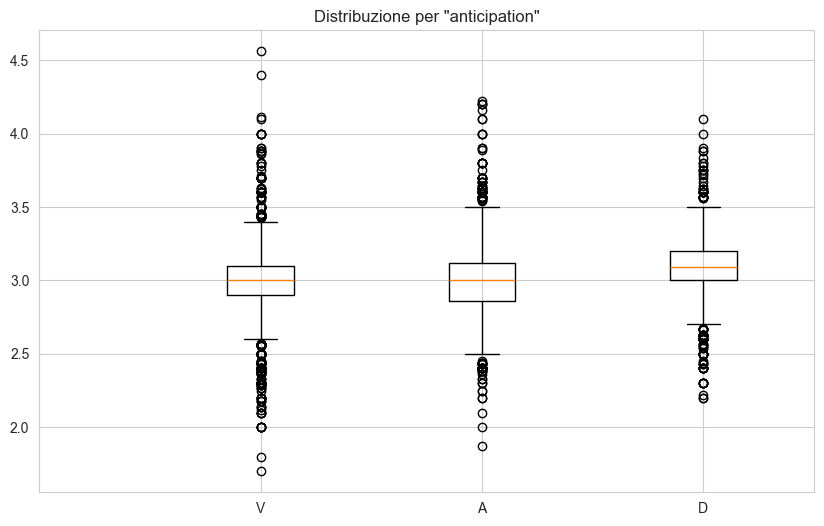

In [347]:
emotions = no_text_data['predicted_emotion'].unique()

for emot in emotions:
    plt.figure(figsize=(10, 6))
    plt.title(f'Distribuzione per "{emot}"')
    plt.boxplot([no_text_data[no_text_data['predicted_emotion'] == emot]['V'], no_text_data[no_text_data['predicted_emotion'] == emot]['A'], no_text_data[no_text_data['predicted_emotion'] == emot]['D']])
    plt.xticks([0, 1, 2, 3], [' ', 'V', 'A', 'D'])
    plt.show()

In [348]:
#encoding emozioni
no_text_data.replace({'predicted_emotion':{'joy':0,'anticipation':1,'surprise':2,'sadness':3}},inplace=True)
no_text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10062 entries, 0 to 10061
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   V                  10062 non-null  float64
 1   A                  10062 non-null  float64
 2   D                  10062 non-null  float64
 3   predicted_emotion  10062 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 314.6 KB


/var/folders/vw/nm4pm2012rj1j5k7yc6x23bw0000gn/T/ipykernel_29637/3031424462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_text_data.replace({'predicted_emotion':{'joy':0,'anticipation':1,'surprise':2,'sadness':3}},inplace=True)


In [349]:
no_text_data.head()

,V,A,D,predicted_emotion
0,3.00,3.00,3.20,2
1,2.80,3.10,2.80,3
2,3.00,3.00,3.00,2
3,3.44,3.00,3.22,0
4,3.55,3.27,3.46,0


<Axes: >

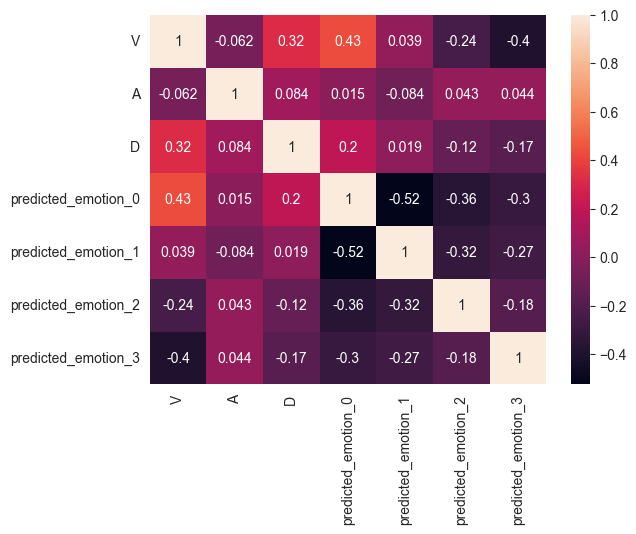

In [350]:
df_encoded = pd.get_dummies(no_text_data, columns=['predicted_emotion'])
for column in df_encoded.columns:
        df_encoded[column] = df_encoded[column].astype(int)
corr = df_encoded.corr()
sns.heatmap(corr, annot= True)

Correlazione valori VAD con l'emozione di joy

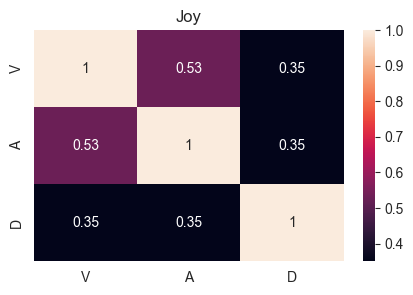

In [351]:
joy = no_text_data.loc[no_text_data.predicted_emotion == 0]
joy = joy[['V', 'A', 'D']]
corr_mat_joy = joy.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("Joy")
plot = sns.heatmap(corr_mat_joy, annot=True)

Correlazione valori VAD con l'emozione di anticipation

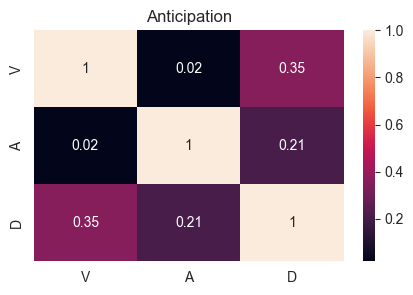

In [352]:
anticipation = no_text_data.loc[no_text_data.predicted_emotion == 1]
anticipation = anticipation[['V', 'A', 'D']]
corr_mat_anticipation = anticipation.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("Anticipation")
plot = sns.heatmap(corr_mat_anticipation, annot=True)

Correlazione valori VAD con l'emozione di surprise

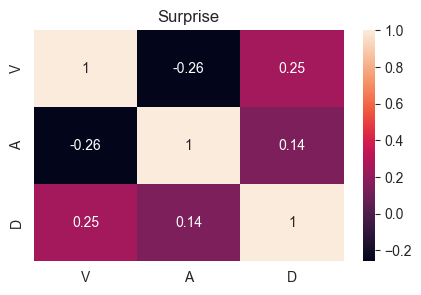

In [353]:
surprise = no_text_data.loc[no_text_data.predicted_emotion == 2]
surprise = surprise[['V', 'A', 'D']]
corr_mat_surprise = surprise.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("Surprise")
plot = sns.heatmap(corr_mat_surprise, annot=True)

Correlazione valori VAD con l'emozione di sadness

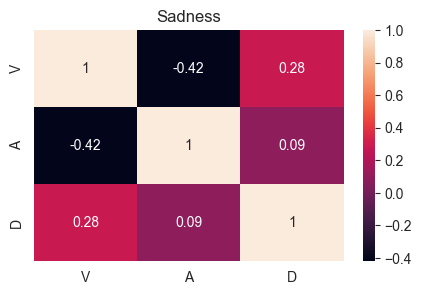

In [354]:
sadness = no_text_data.loc[no_text_data.predicted_emotion == 3]
sadness = sadness[['V', 'A', 'D']]
corr_mat_sadness = sadness.corr().round(2)
plt.figure(figsize=(5,3))
plt.title("Sadness")
plot = sns.heatmap(corr_mat_sadness, annot=True)